In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [6]:
df.dropna(inplace=True)

In [7]:
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [8]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df)

In [16]:
pca_fit

array([[ 7.68482432e-02,  1.65352465e+00],
       [ 3.37126792e-01, -2.32055981e+00],
       [ 3.40836188e+00,  7.55756506e-01],
       [-2.64222127e+00, -3.61486414e-01],
       [ 1.07168072e+00, -1.51167360e+00],
       [-4.14334694e+00,  1.52761501e+00],
       [-3.66187880e+00,  7.26482752e-01],
       [-3.46358326e+00, -1.11932250e-01],
       [ 3.95881864e+00,  2.16536132e+00],
       [ 2.97619746e+00, -2.18509076e+00],
       [-2.00435156e+00,  1.62310751e+00],
       [-8.22584224e-01, -5.87547914e-01],
       [-2.24564747e+00,  1.81903669e+00],
       [-1.12980749e+00,  2.57831292e+00],
       [ 5.74490571e+00,  2.22535369e-01],
       [-3.74756191e+00,  1.33933904e+00],
       [-3.28875794e+00,  2.29328755e+00],
       [-1.85723415e+00, -1.43268195e+00],
       [-2.29170256e+00, -9.25891185e-01],
       [ 2.54702025e-01, -1.12943118e+00],
       [ 5.83585565e+00, -2.23890882e-01],
       [ 7.95632970e-01, -1.52534619e+00],
       [-1.83824827e+00,  1.52283175e+00],
       [ 1.

In [17]:
component_df = pd.DataFrame(data = pca_fit, columns=['first_component', 'second_component'])
component_df

,first_component,second_component
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


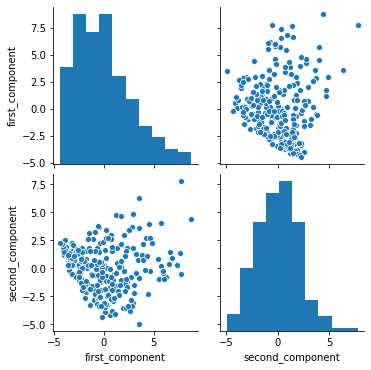

In [18]:
sns.pairplot(component_df)

In [21]:
print(pca.explained_variance_ratio_)#first component represents 45% correctly.2nd component &24

[0.45245466 0.24246801]


Text(0, 0.5, 'Variance Ratio')

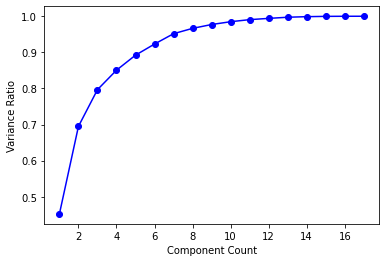

In [28]:
pca = PCA().fit(df)
x = range(1,18)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_),'bo-')
plt.xlabel('Component Count')
plt.ylabel('Variance Ratio')

In [29]:
pca.explained_variance_ratio_

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

In [24]:
pca.explained_variance_ratio_.cumsum()

array([0.45245466, 0.69492267, 0.79661947, 0.85055387, 0.89216822,
       0.92298014, 0.95167354, 0.96643244, 0.97707042, 0.9848601 ,
       0.99058665, 0.99407848, 0.99724583, 0.99881851, 0.99964648,
       0.9999293 , 1.        ])

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
pca_fit =  pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 , 0.0539344 , 0.04161435,
       0.03081193, 0.02869339])